<a href="https://colab.research.google.com/github/ramikadri/ramikadri/blob/main/Medical%20Data%20Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df = pd.read_csv('medical_examination.csv')

In [35]:
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [36]:
df['overweight'] = df['weight'] / ((df['height']/100) ** 2) 
df["overweight"]= df['overweight'] > 25
df['overweight']= df["overweight"].astype(int)


In [37]:
df["cholesterol"]= df['cholesterol'] > 1
df["cholesterol"]= df['cholesterol'].astype(int)
df["gluc"]= df['gluc'] > 1
df["gluc"]= df['gluc'].astype(int)  
df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [38]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [39]:
df_heat =df[df["ap_lo"]<= df['ap_hi']]

df_heat


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [40]:
df_cat = df[['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke','cardio']]
df_cat=df_cat.melt(id_vars='cardio')



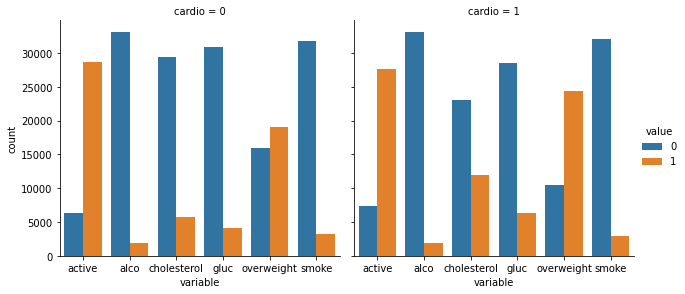

In [41]:
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_cat, kind="count",
                height=4, aspect=1.1);

In [42]:
df_heat =df[df["ap_lo"]<= df['ap_hi']]
df_heat=df_heat[(df_heat['height'] >= df_heat['height'].quantile(0.025))]
df_heat=df_heat[(df_heat['height'] <= df_heat['height'].quantile(0.975))]
df_heat=df_heat[(df_heat['weight'] >= df_heat['weight'].quantile(0.025))]
df_heat=df_heat[(df_heat['weight'] <= df_heat['weight'].quantile(0.975))]

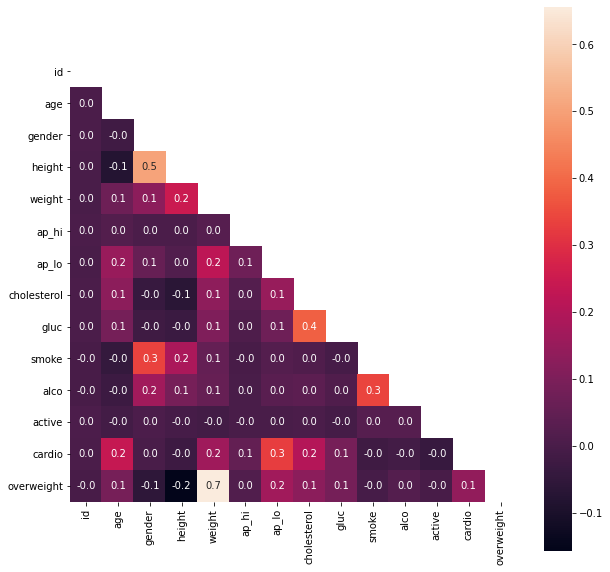

In [43]:
fig, ax = plt.subplots(figsize=(10,10))
corr = df_heat.corr()
mask= np.triu(corr)
sns.heatmap(
    corr,
    
    annot=True,
    mask= mask,
    
    fmt='.1f',
    ax=ax,
    
    
    square=True
)